## Load the datasets

In [25]:
from datasets import load_dataset, load_metric

datasets = []

dataset = load_dataset("json", data_files="/mnt/data/andre/mscthesis/perturbations_buglab/generated_defects4j_buglab/*.json", field="bugs")
datasets.append({"dataset" : dataset , "orig_dataset" : "Defects4J v2.0" , "perturbation_model" : "BugLab"})

dataset = load_dataset("json", data_files="/mnt/data/andre/mscthesis/perturbations_selfapr/generated_defects4j_selfapr/*.json", field="bugs")
datasets.append({"dataset" : dataset , "orig_dataset" : "Defects4J v2.0" , "perturbation_model" : "SelfAPR"})

dataset = load_dataset("json", data_files="/mnt/data/andre/mscthesis/perturbations_buglab/generated_bears_buglab/*.json", field="bugs")
datasets.append({"dataset" : dataset , "orig_dataset" : "Bears" , "perturbation_model" : "BugLab"})

dataset = load_dataset("json", data_files="/mnt/data/andre/mscthesis/perturbations_selfapr/generated_bears_selfapr/*.json", field="bugs")
datasets.append({"dataset" : dataset , "orig_dataset" : "Bears" , "perturbation_model" : "SelfAPR"})

print(datasets)

Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

Using custom data configuration default-7d721f3b83caa41e
Reusing dataset json (/home/andre/.cache/huggingface/datasets/json/default-7d721f3b83caa41e/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)


  0%|          | 0/1 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

Using custom data configuration default-70dff1aa2bbb9a72
Reusing dataset json (/home/andre/.cache/huggingface/datasets/json/default-70dff1aa2bbb9a72/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)


  0%|          | 0/1 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

Using custom data configuration default-341058fabc1caea4
Reusing dataset json (/home/andre/.cache/huggingface/datasets/json/default-341058fabc1caea4/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)


  0%|          | 0/1 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

Using custom data configuration default-d6a690efd04169d8
Reusing dataset json (/home/andre/.cache/huggingface/datasets/json/default-d6a690efd04169d8/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)


  0%|          | 0/1 [00:00<?, ?it/s]

[{'dataset': DatasetDict({
    train: Dataset({
        features: ['identifier', 'path', 'diff', 'context', 'perturb_rule'],
        num_rows: 424599
    })
}), 'orig_dataset': 'Defects4J v2.0', 'perturbation_model': 'BugLab'}, {'dataset': DatasetDict({
    train: Dataset({
        features: ['identifier', 'path', 'diff', 'context', 'perturb_rule'],
        num_rows: 1607022
    })
}), 'orig_dataset': 'Defects4J v2.0', 'perturbation_model': 'SelfAPR'}, {'dataset': DatasetDict({
    train: Dataset({
        features: ['identifier', 'path', 'diff', 'context', 'perturb_rule'],
        num_rows: 838072
    })
}), 'orig_dataset': 'Bears', 'perturbation_model': 'BugLab'}, {'dataset': DatasetDict({
    train: Dataset({
        features: ['identifier', 'path', 'diff', 'context', 'perturb_rule'],
        num_rows: 4023402
    })
}), 'orig_dataset': 'Bears', 'perturbation_model': 'SelfAPR'}]


## Dataset Overview

In [35]:
import pandas as pd

df = pd.DataFrame(datasets)
df = df.reindex(columns=["orig_dataset", "perturbation_model", "dataset"])
df["dataset"] = df["dataset"].apply(lambda x: len(x["train"]))
df = df.rename(columns={"orig_dataset":"Fixed Corpus Dataset", "perturbation_model": "Perturbation Model", "dataset" : "# Generated Bugs"})
df = df.set_index("Fixed Corpus Dataset")
print(df.to_latex(caption="Overview of the generated datasets. SelfAPR is more proficuous then BugLab across both datasets.", 
                  label="tab:overview_generated_datasets"))

\begin{table}
\centering
\caption{Overview of the generated datasets. SelfAPR is more proficuous then BugLab across both datasets.}
\label{tab:overview_generated_datasets}
\begin{tabular}{llr}
\toprule
{} & Perturbation Model &  \# Generated Bugs \\
Fixed Corpus Dataset &                    &                   \\
\midrule
Defects4J v2.0       &             BugLab &            424599 \\
Defects4J v2.0       &            SelfAPR &           1607022 \\
Bears                &             BugLab &            838072 \\
Bears                &            SelfAPR &           4023402 \\
\bottomrule
\end{tabular}
\end{table}



## Perturbation Rules Analysis

{'BugLab-Rule4': 58889, 'BugLab-Rule2': 92103, 'BugLab-Rule3': 99012, 'BugLab-Rule1': 174595}


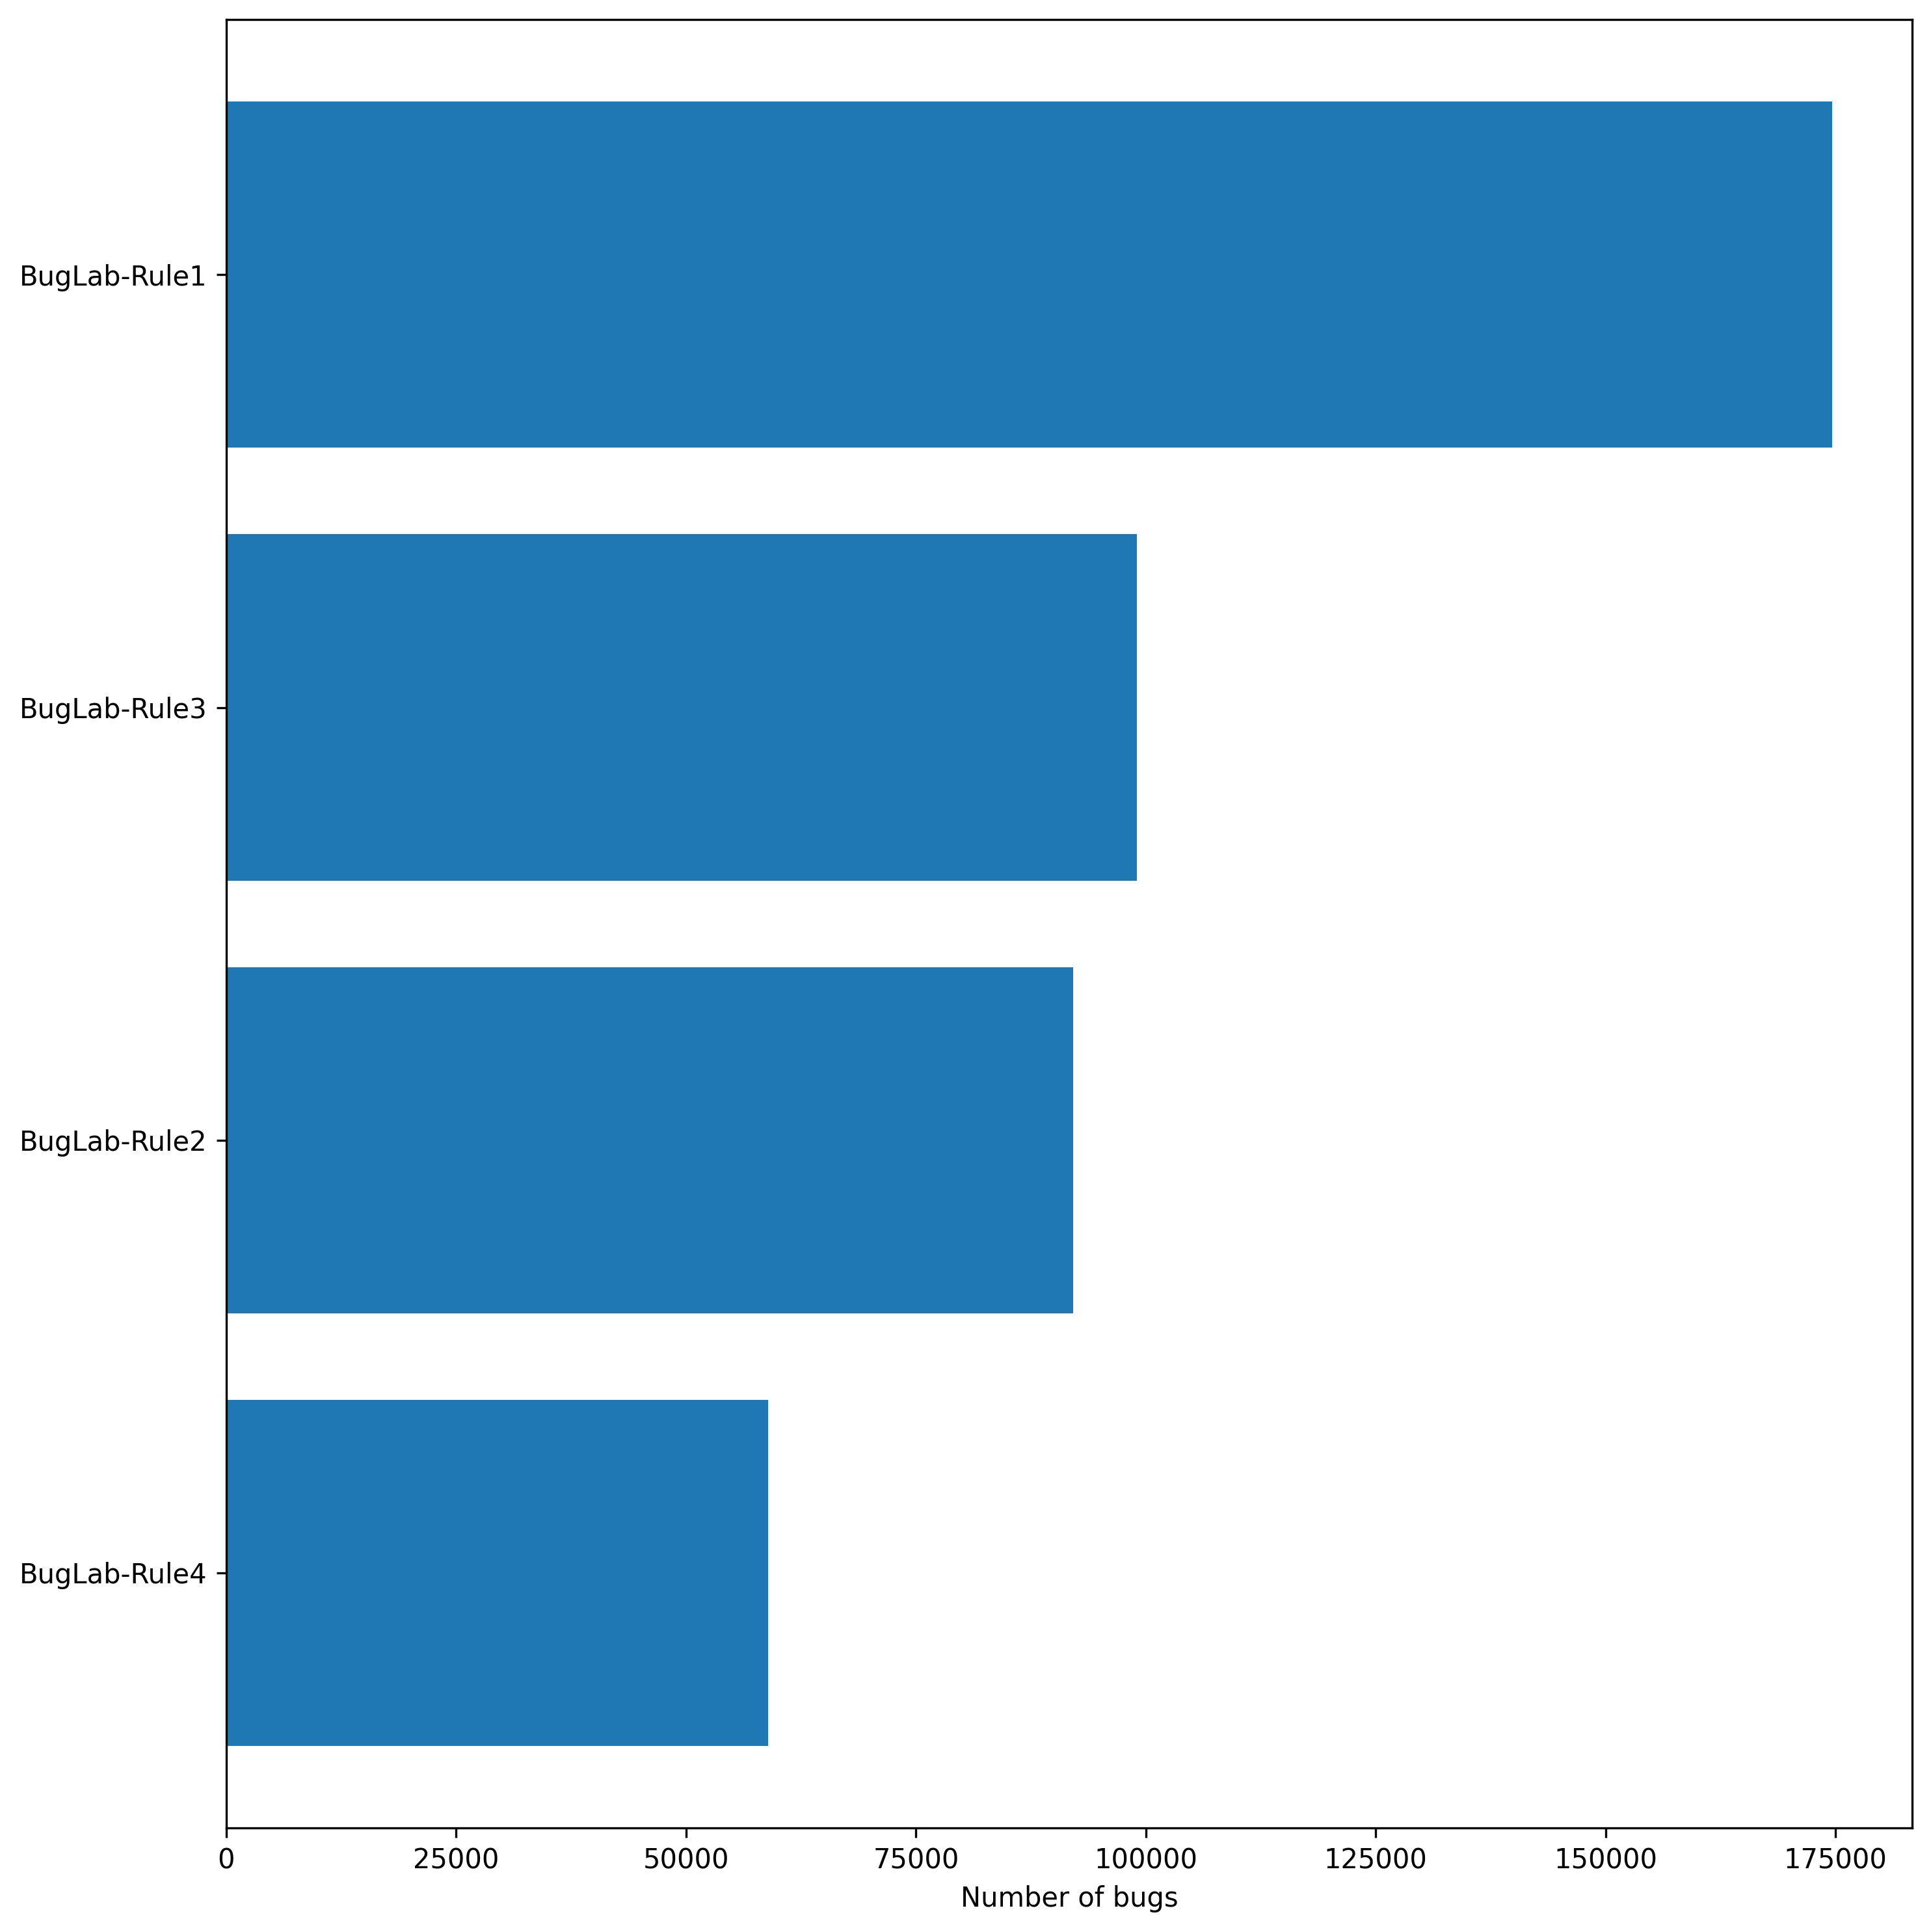

{'Csv-1': 819, 'Jsoup-1': 1508, 'Cli-1': 1610, 'JacksonXml-1': 2990, 'Gson-1': 3774, 'Codec-1': 5952, 'Compress-1': 12048, 'Math-106': 13428, 'JxPath-1': 15511, 'Collections-25': 16850, 'Lang-65': 24755, 'JacksonCore-1': 26597, 'Mockito-38': 28491, 'JacksonDatabind-1': 31149, 'Time-27': 58533, 'Closure-106': 77030, 'Chart-26': 103554}


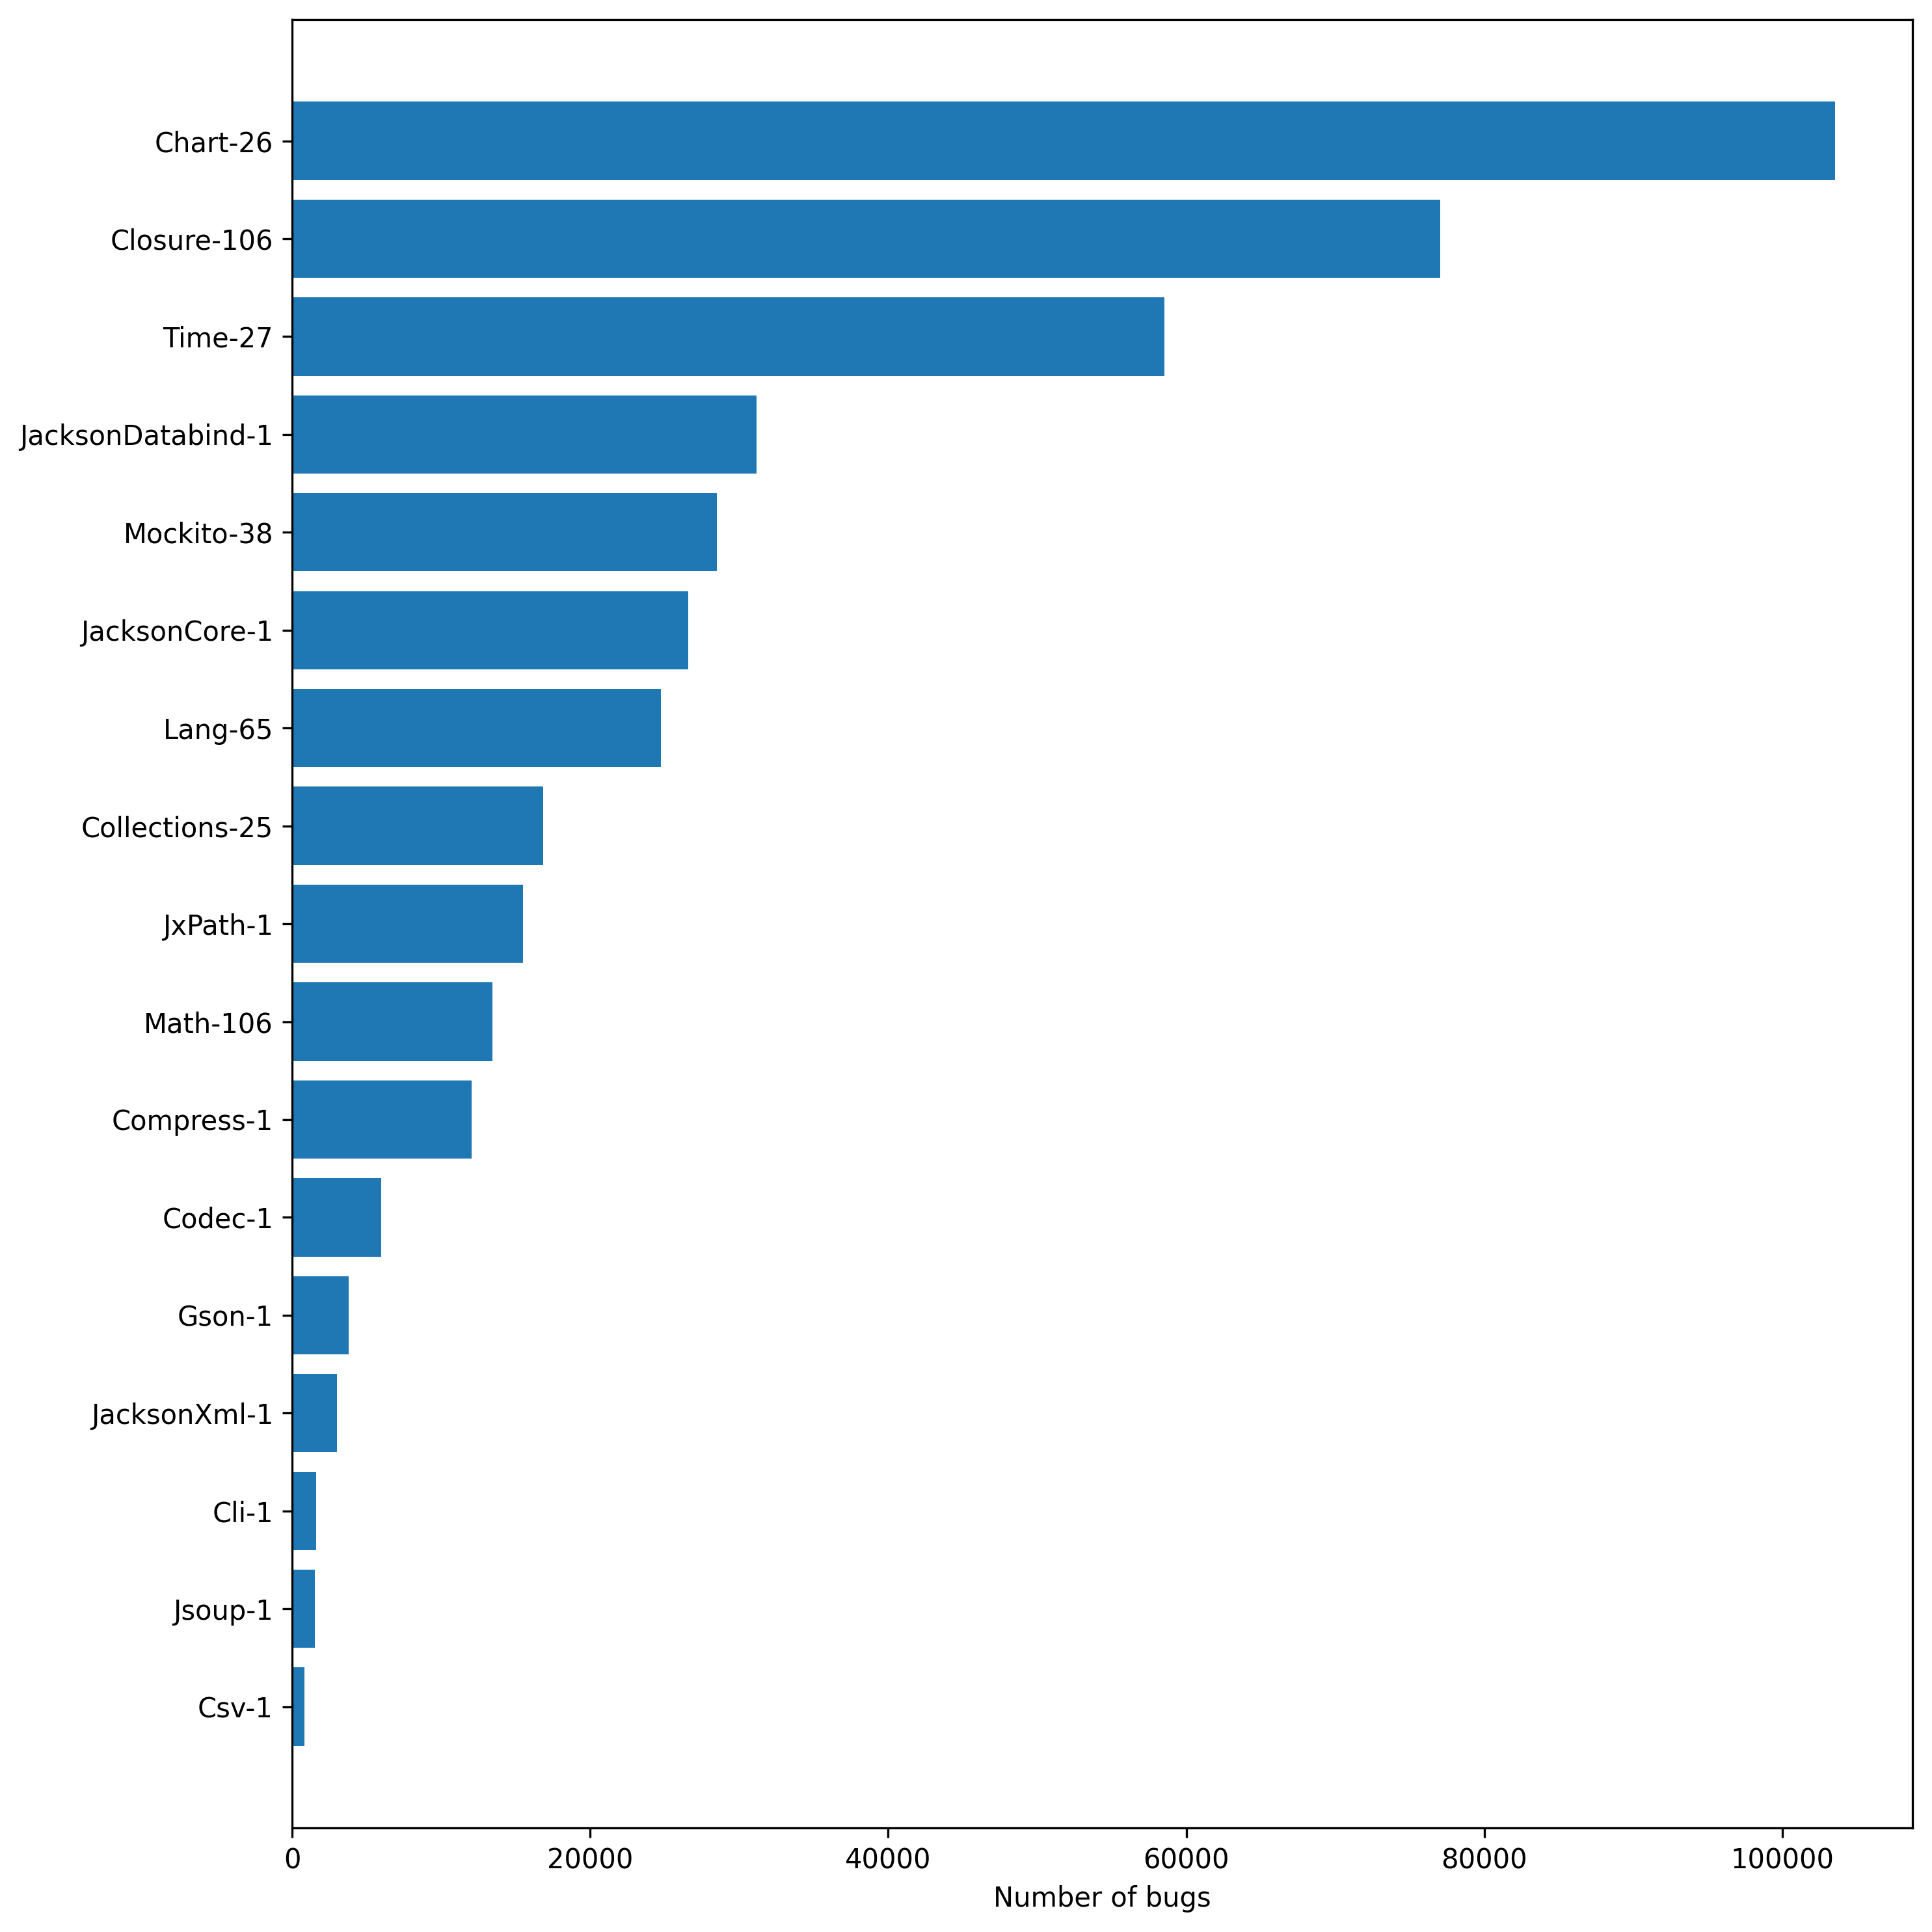

{'SelfAPR-Rule12': 8788, 'SelfAPR-Rule4': 14114, 'SelfAPR-Rule1': 22445, 'SelfAPR-Rule16': 25163, 'SelfAPR-Rule15': 25187, 'SelfAPR-Rule6': 40680, 'SelfAPR-Rule9': 75491, 'SelfAPR-Rule2': 85034, 'SelfAPR-Rule14': 85482, 'SelfAPR-Rule13': 95048, 'SelfAPR-Rule3': 98224, 'SelfAPR-Rule7': 103276, 'SelfAPR-Rule8': 135944, 'SelfAPR-Rule10': 157831, 'SelfAPR-Rule5': 266761, 'SelfAPR-Rule11': 367554}


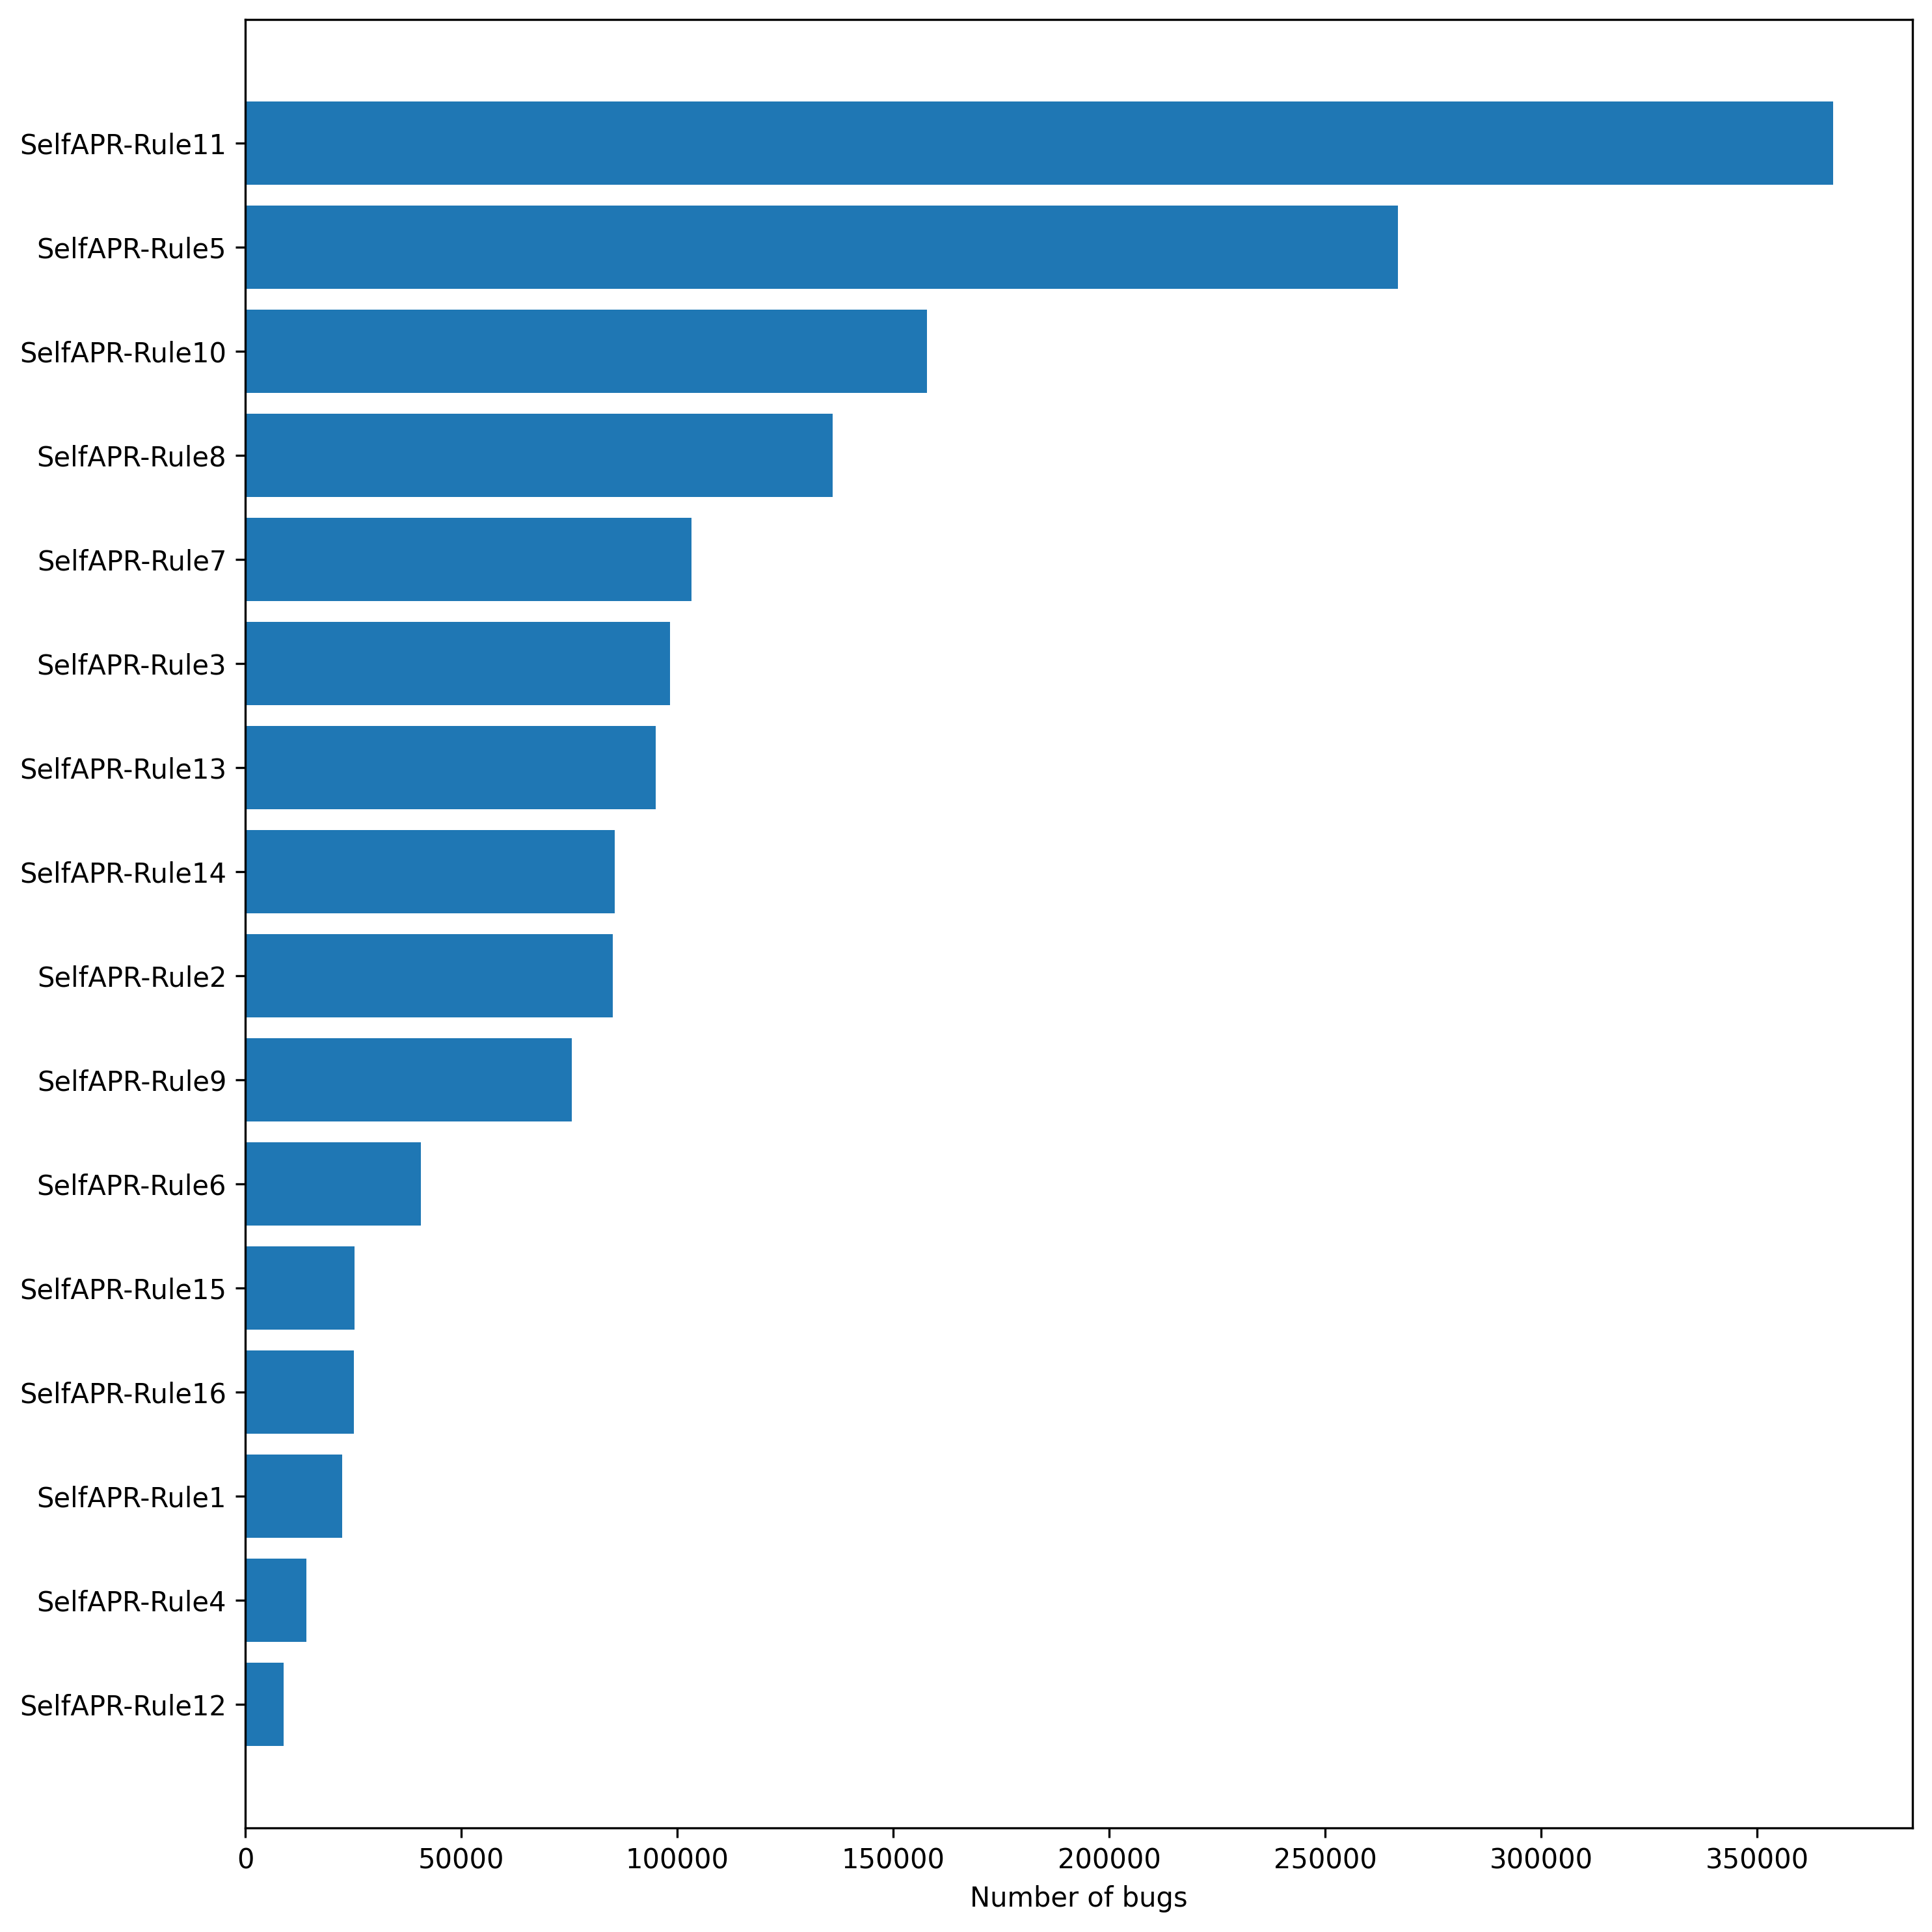

{'Csv-1': 3117, 'Cli-1': 7608, 'Jsoup-1': 8645, 'Codec-1': 13537, 'JacksonXml-1': 16270, 'Gson-1': 23153, 'Compress-1': 34956, 'Math-106': 39133, 'JxPath-1': 59707, 'JacksonCore-1': 74002, 'Lang-65': 85342, 'Collections-25': 85782, 'Mockito-38': 109462, 'JacksonDatabind-1': 157261, 'Time-27': 220432, 'Closure-106': 303049, 'Chart-26': 365566}


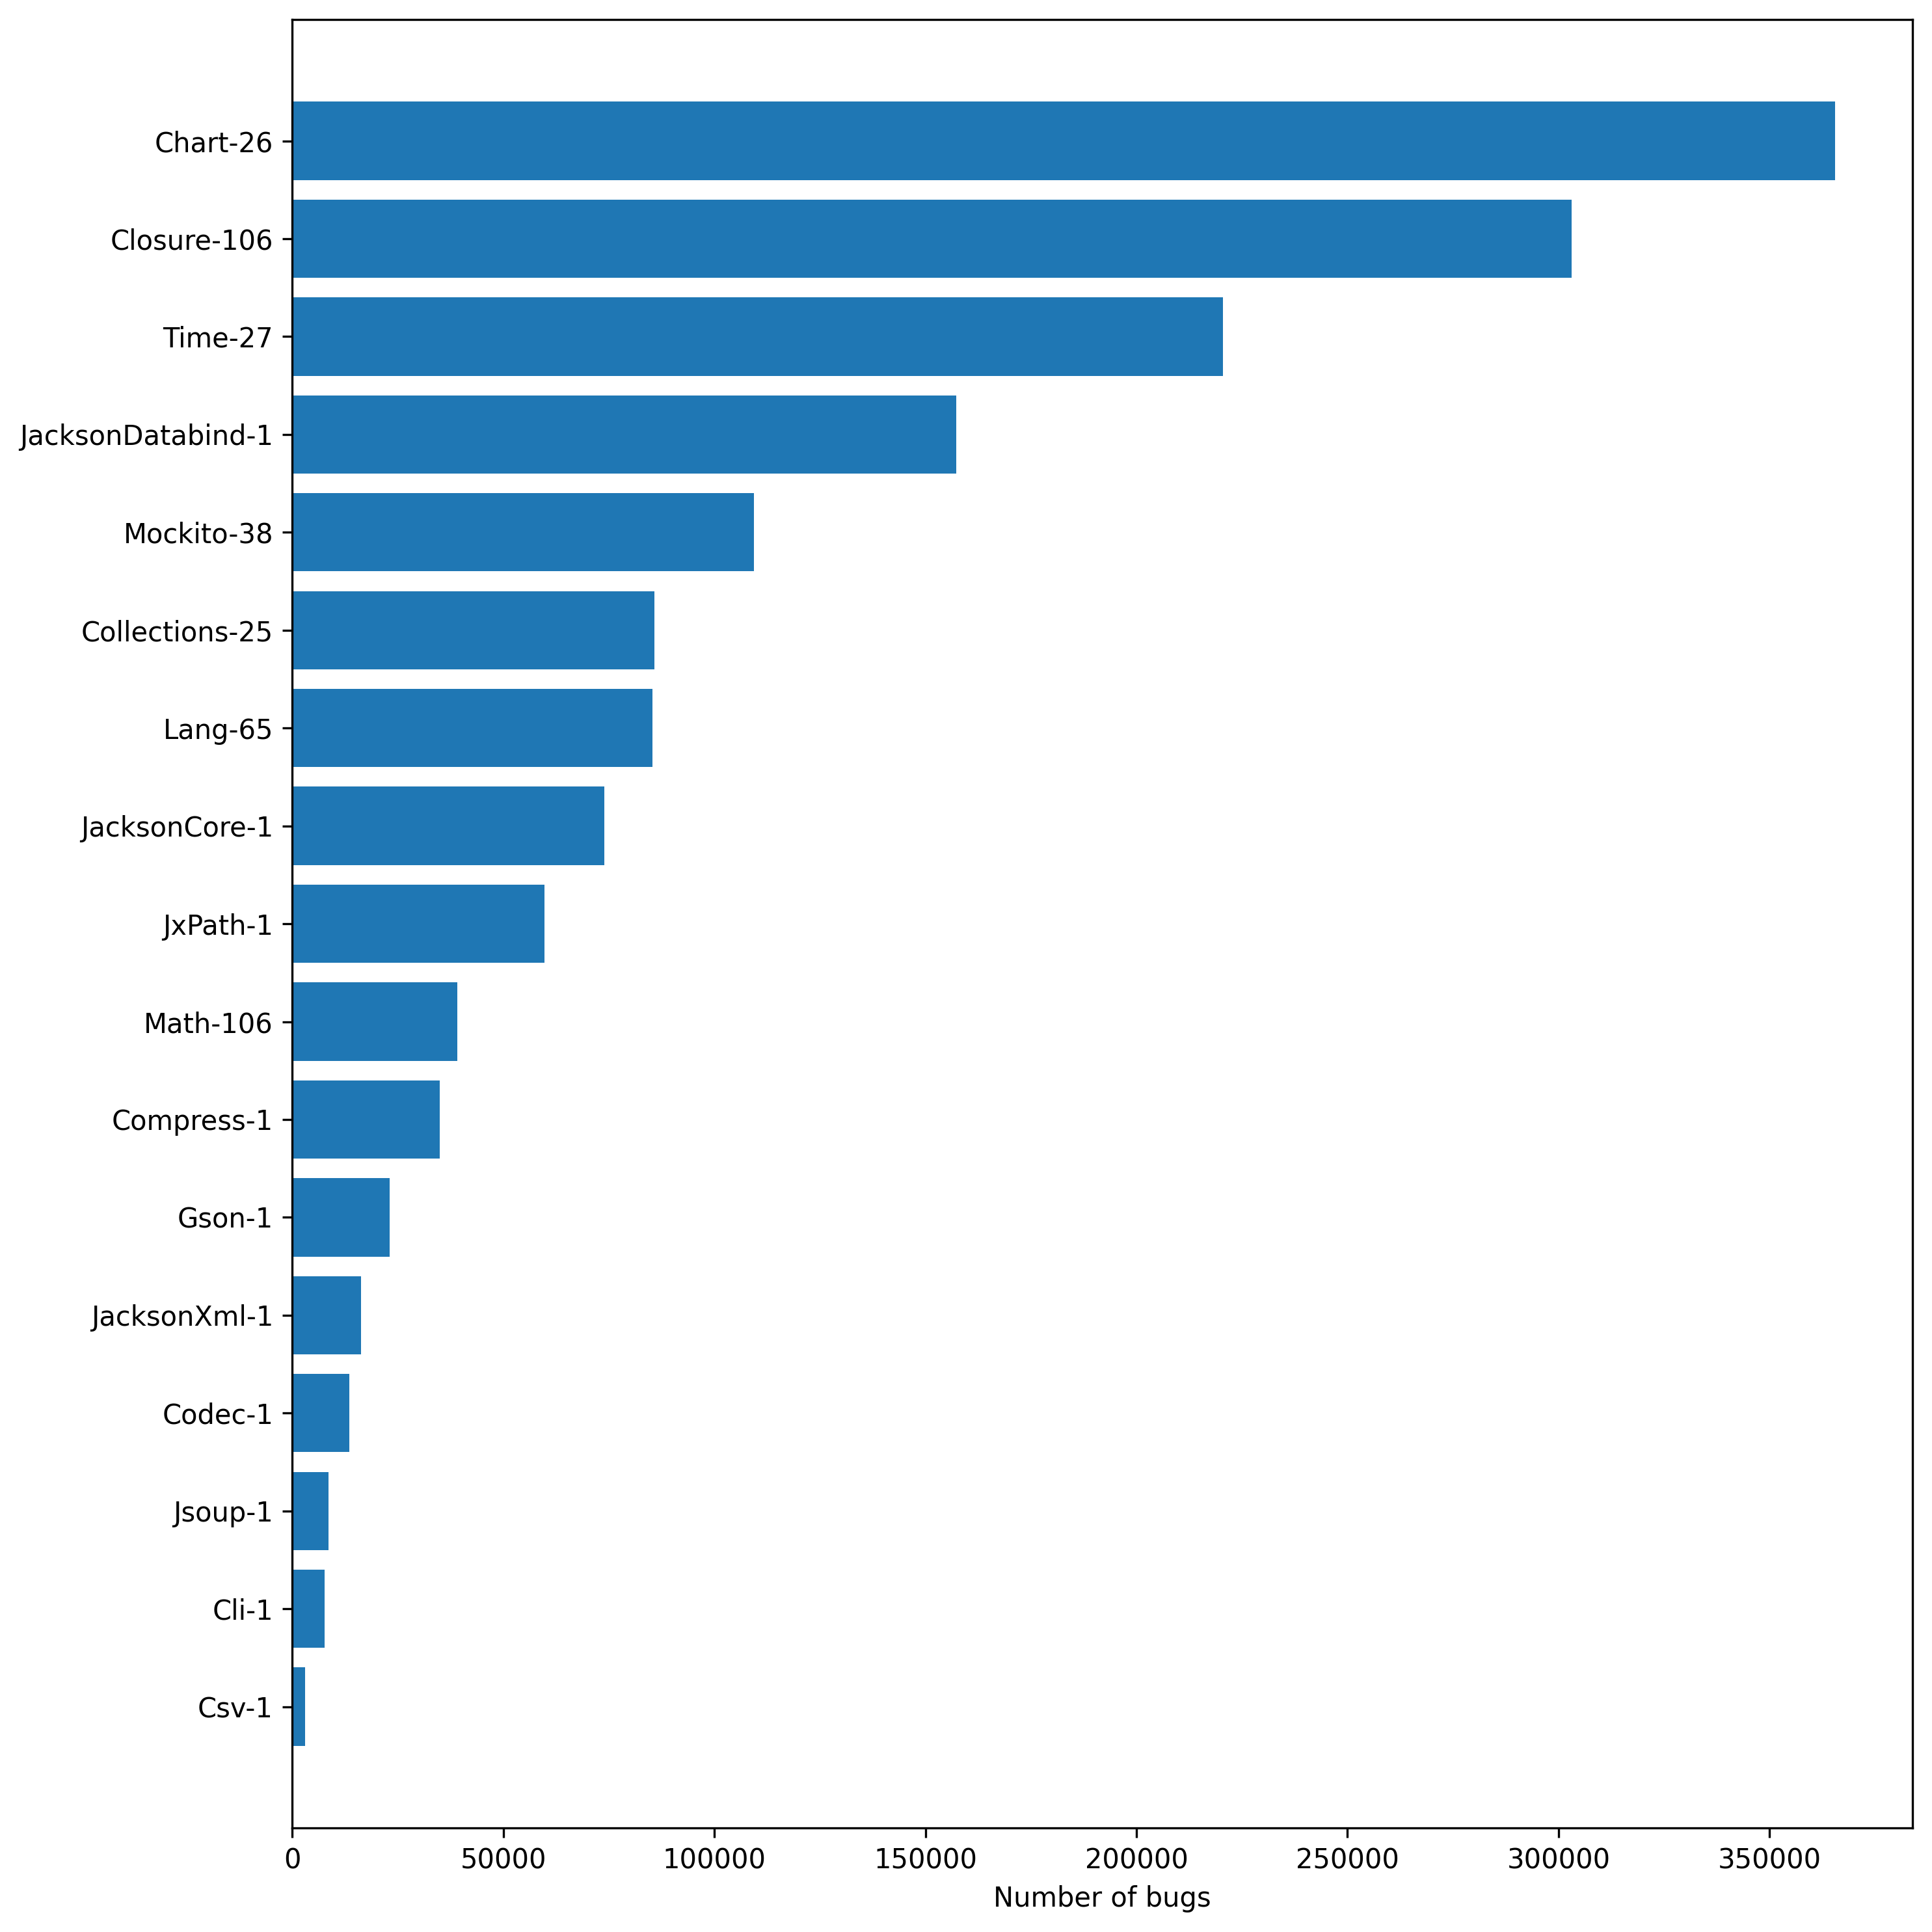

{'BugLab-Rule4': 108535, 'BugLab-Rule3': 205670, 'BugLab-Rule2': 206475, 'BugLab-Rule1': 317392}


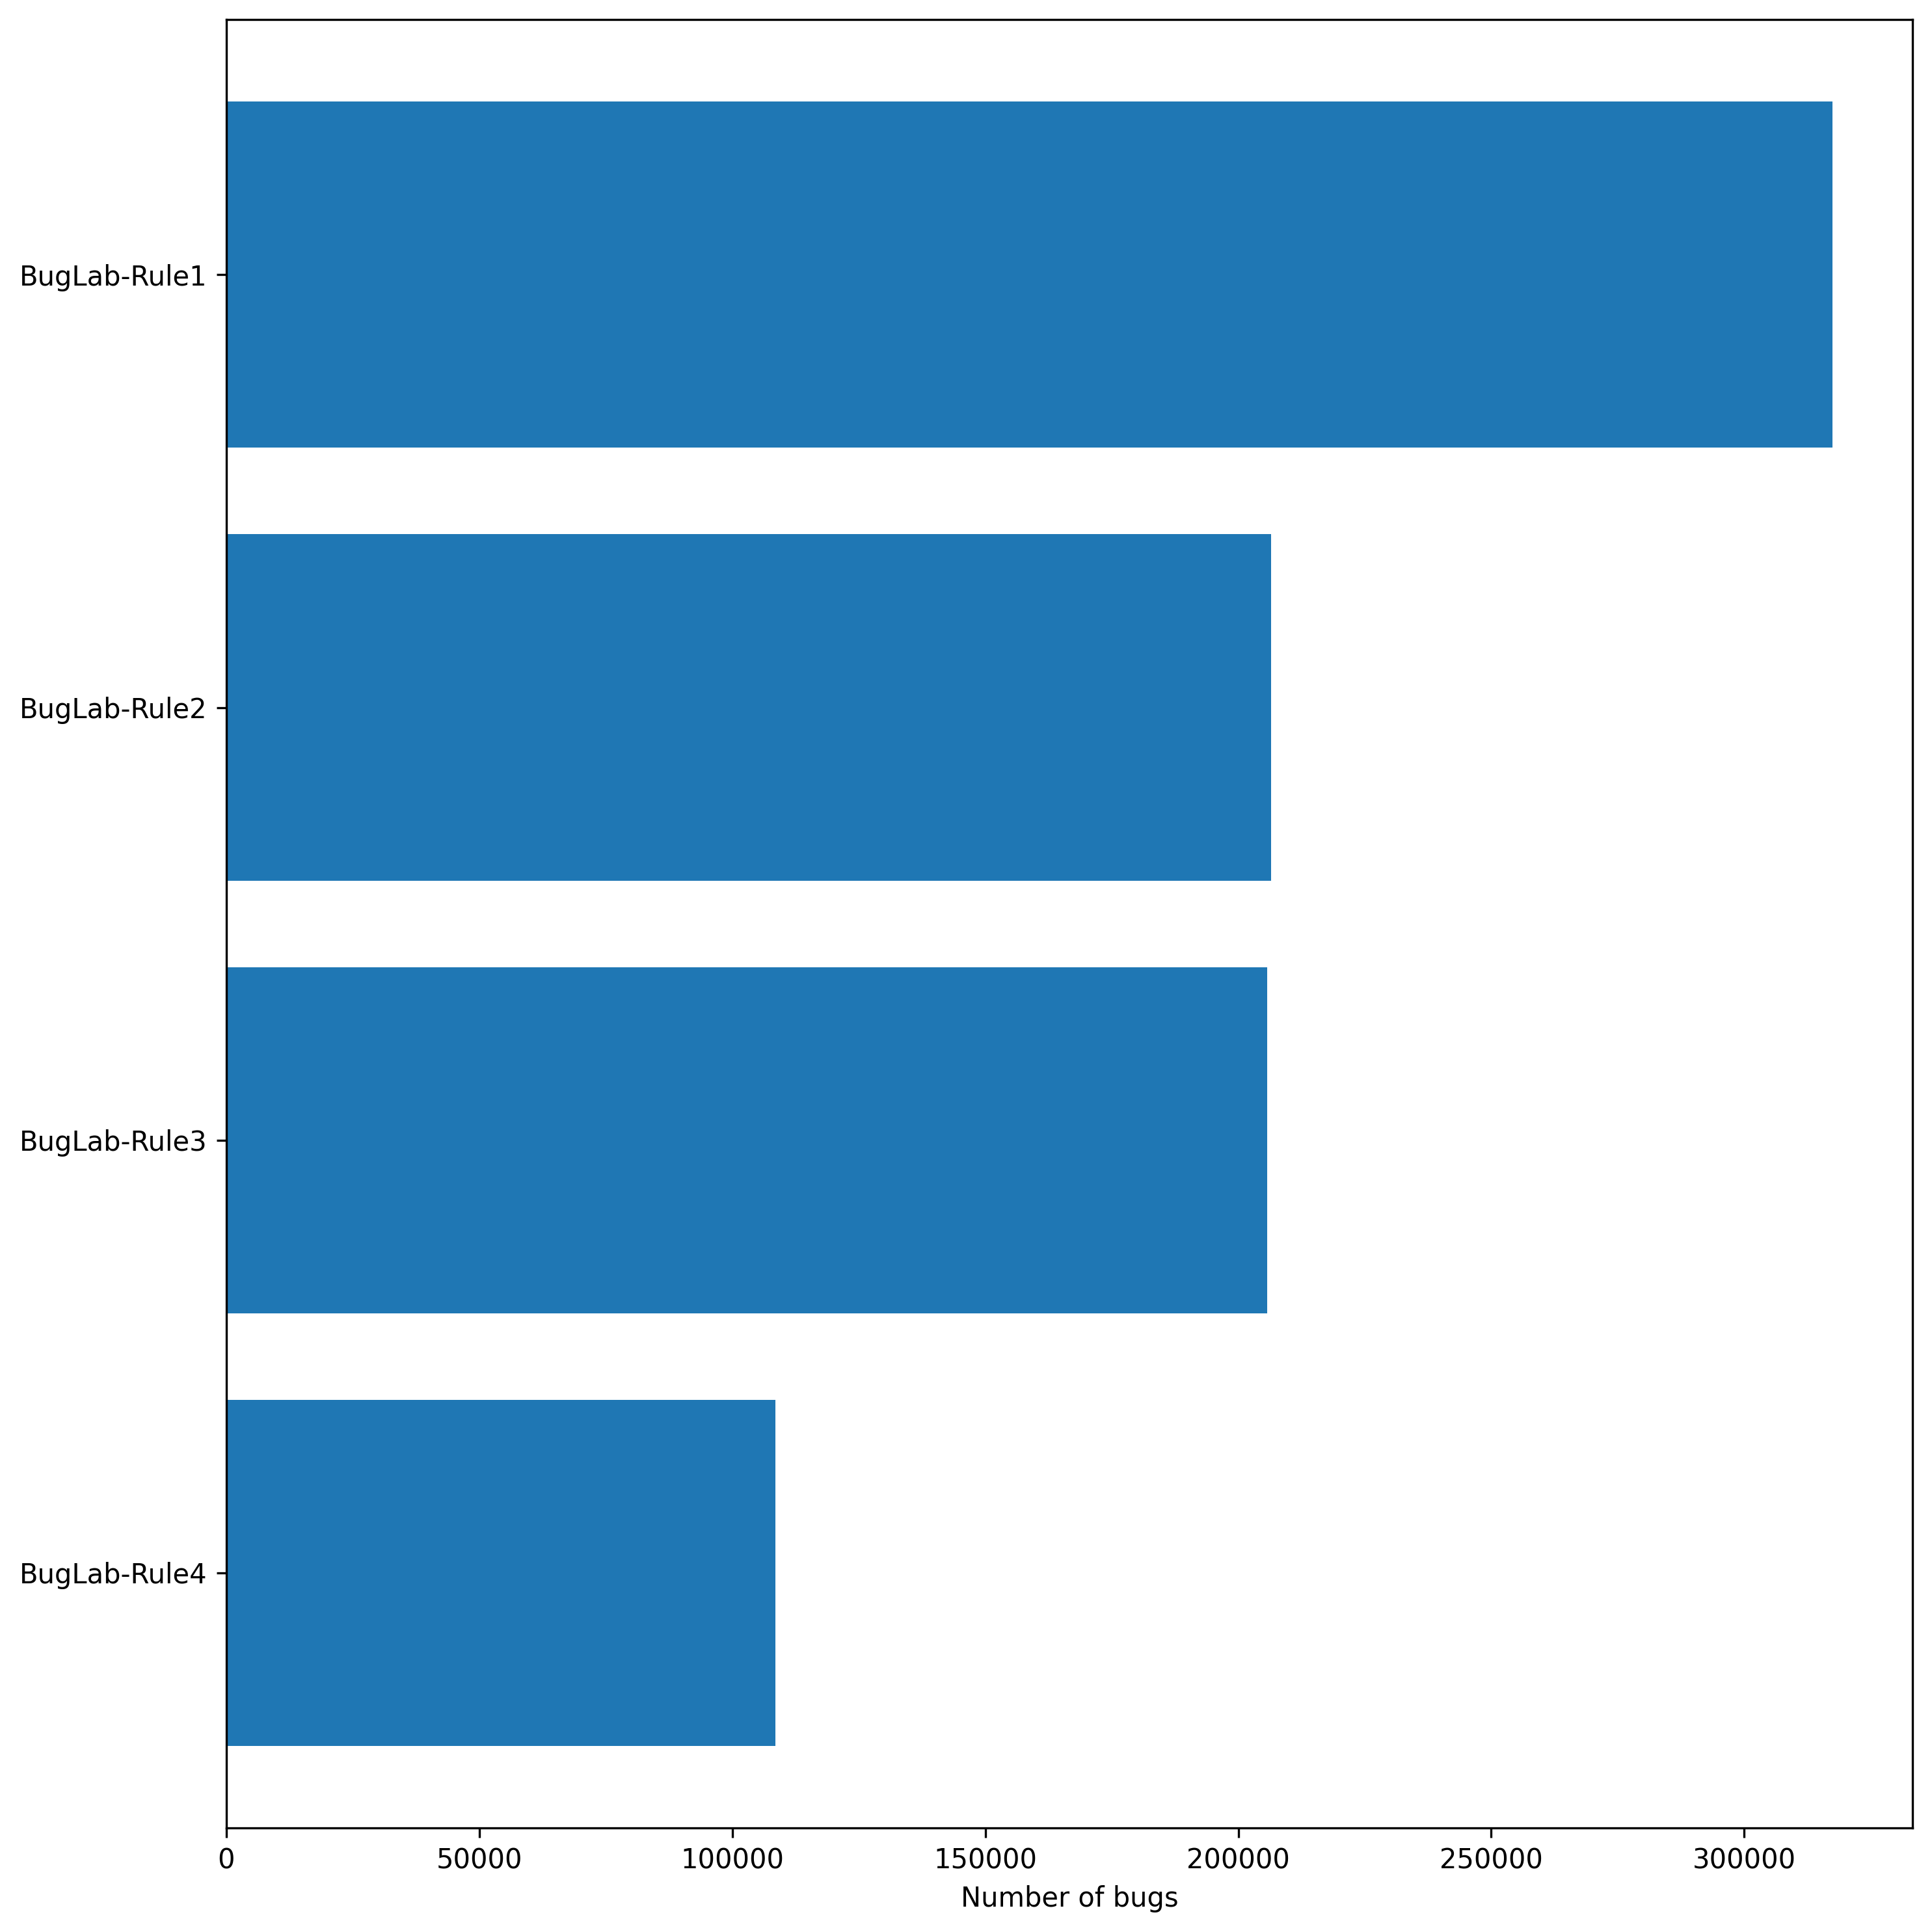

{'Bears-223': 3, 'Bears-240': 48, 'Bears-234': 62, 'Bears-238': 71, 'Bears-230': 111, 'Bears-224': 117, 'Bears-209': 166, 'Bears-193': 167, 'Bears-243': 206, 'Bears-188': 228, 'Bears-241': 465, 'Bears-232': 519, 'Bears-204': 702, 'Bears-140': 736, 'Bears-180': 1007, 'Bears-210': 1546, 'Bears-213': 1560, 'Bears-207': 1896, 'Bears-194': 2163, 'Bears-184': 2517, 'Bears-245': 2834, 'Bears-201': 2887, 'Bears-231': 3303, 'Bears-198': 4074, 'Bears-190': 4184, 'Bears-249': 4466, 'Bears-246': 4859, 'Bears-227': 4913, 'Bears-196': 5208, 'Bears-166': 5389, 'Bears-233': 6215, 'Bears-199': 7979, 'Bears-229': 8446, 'Bears-220': 8517, 'Bears-239': 8687, 'Bears-144': 10127, 'Bears-153': 10893, 'Bears-212': 13900, 'Bears-242': 14473, 'Bears-225': 16235, 'Bears-228': 16622, 'Bears-159': 16926, 'Bears-176': 19108, 'Bears-202': 21950, 'Bears-250': 23556, 'Bears-98': 23740, 'Bears-200': 29794, 'Bears-222': 34086, 'Bears-211': 35619, 'Bears-251': 38936, 'Bears-1': 46170, 'Bears-158': 59010, 'Bears-206': 616

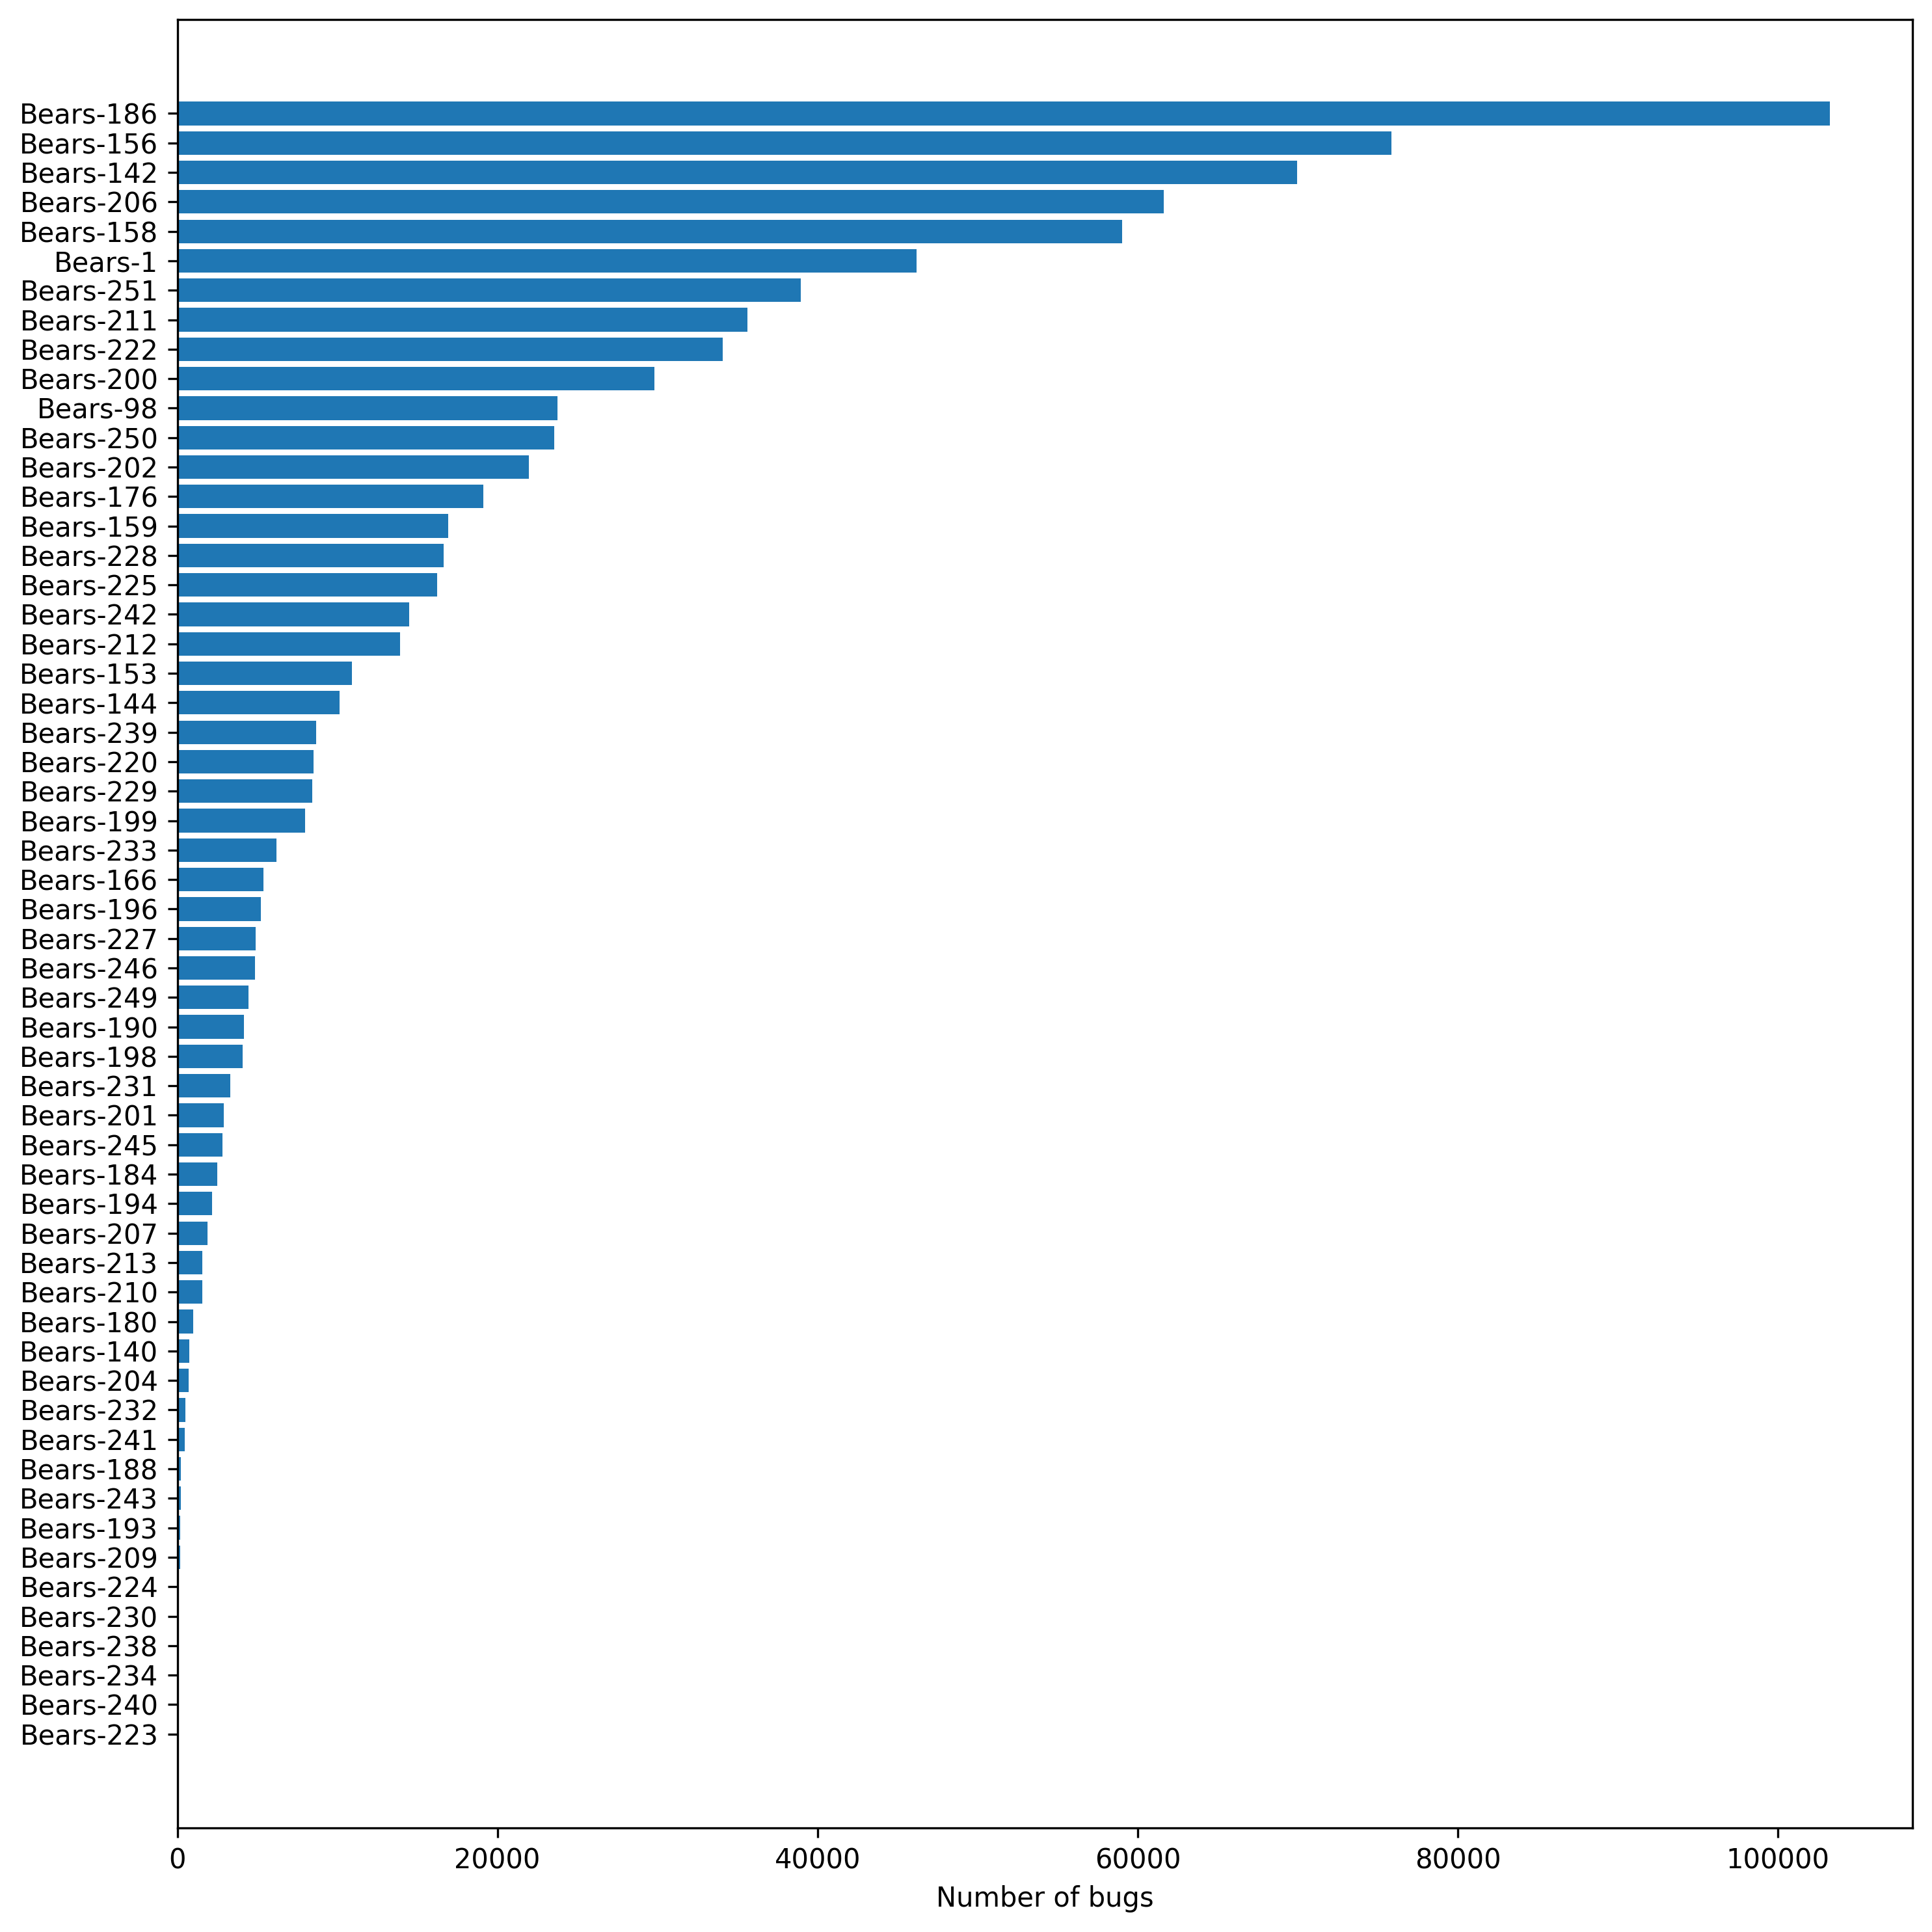

{'SelfAPR-Rule12': 25147, 'SelfAPR-Rule4': 38755, 'SelfAPR-Rule16': 56583, 'SelfAPR-Rule15': 56719, 'SelfAPR-Rule1': 57350, 'SelfAPR-Rule6': 94841, 'SelfAPR-Rule9': 128109, 'SelfAPR-Rule13': 165114, 'SelfAPR-Rule2': 181984, 'SelfAPR-Rule14': 262664, 'SelfAPR-Rule7': 315771, 'SelfAPR-Rule8': 352773, 'SelfAPR-Rule3': 391548, 'SelfAPR-Rule10': 463980, 'SelfAPR-Rule5': 584311, 'SelfAPR-Rule11': 847753}


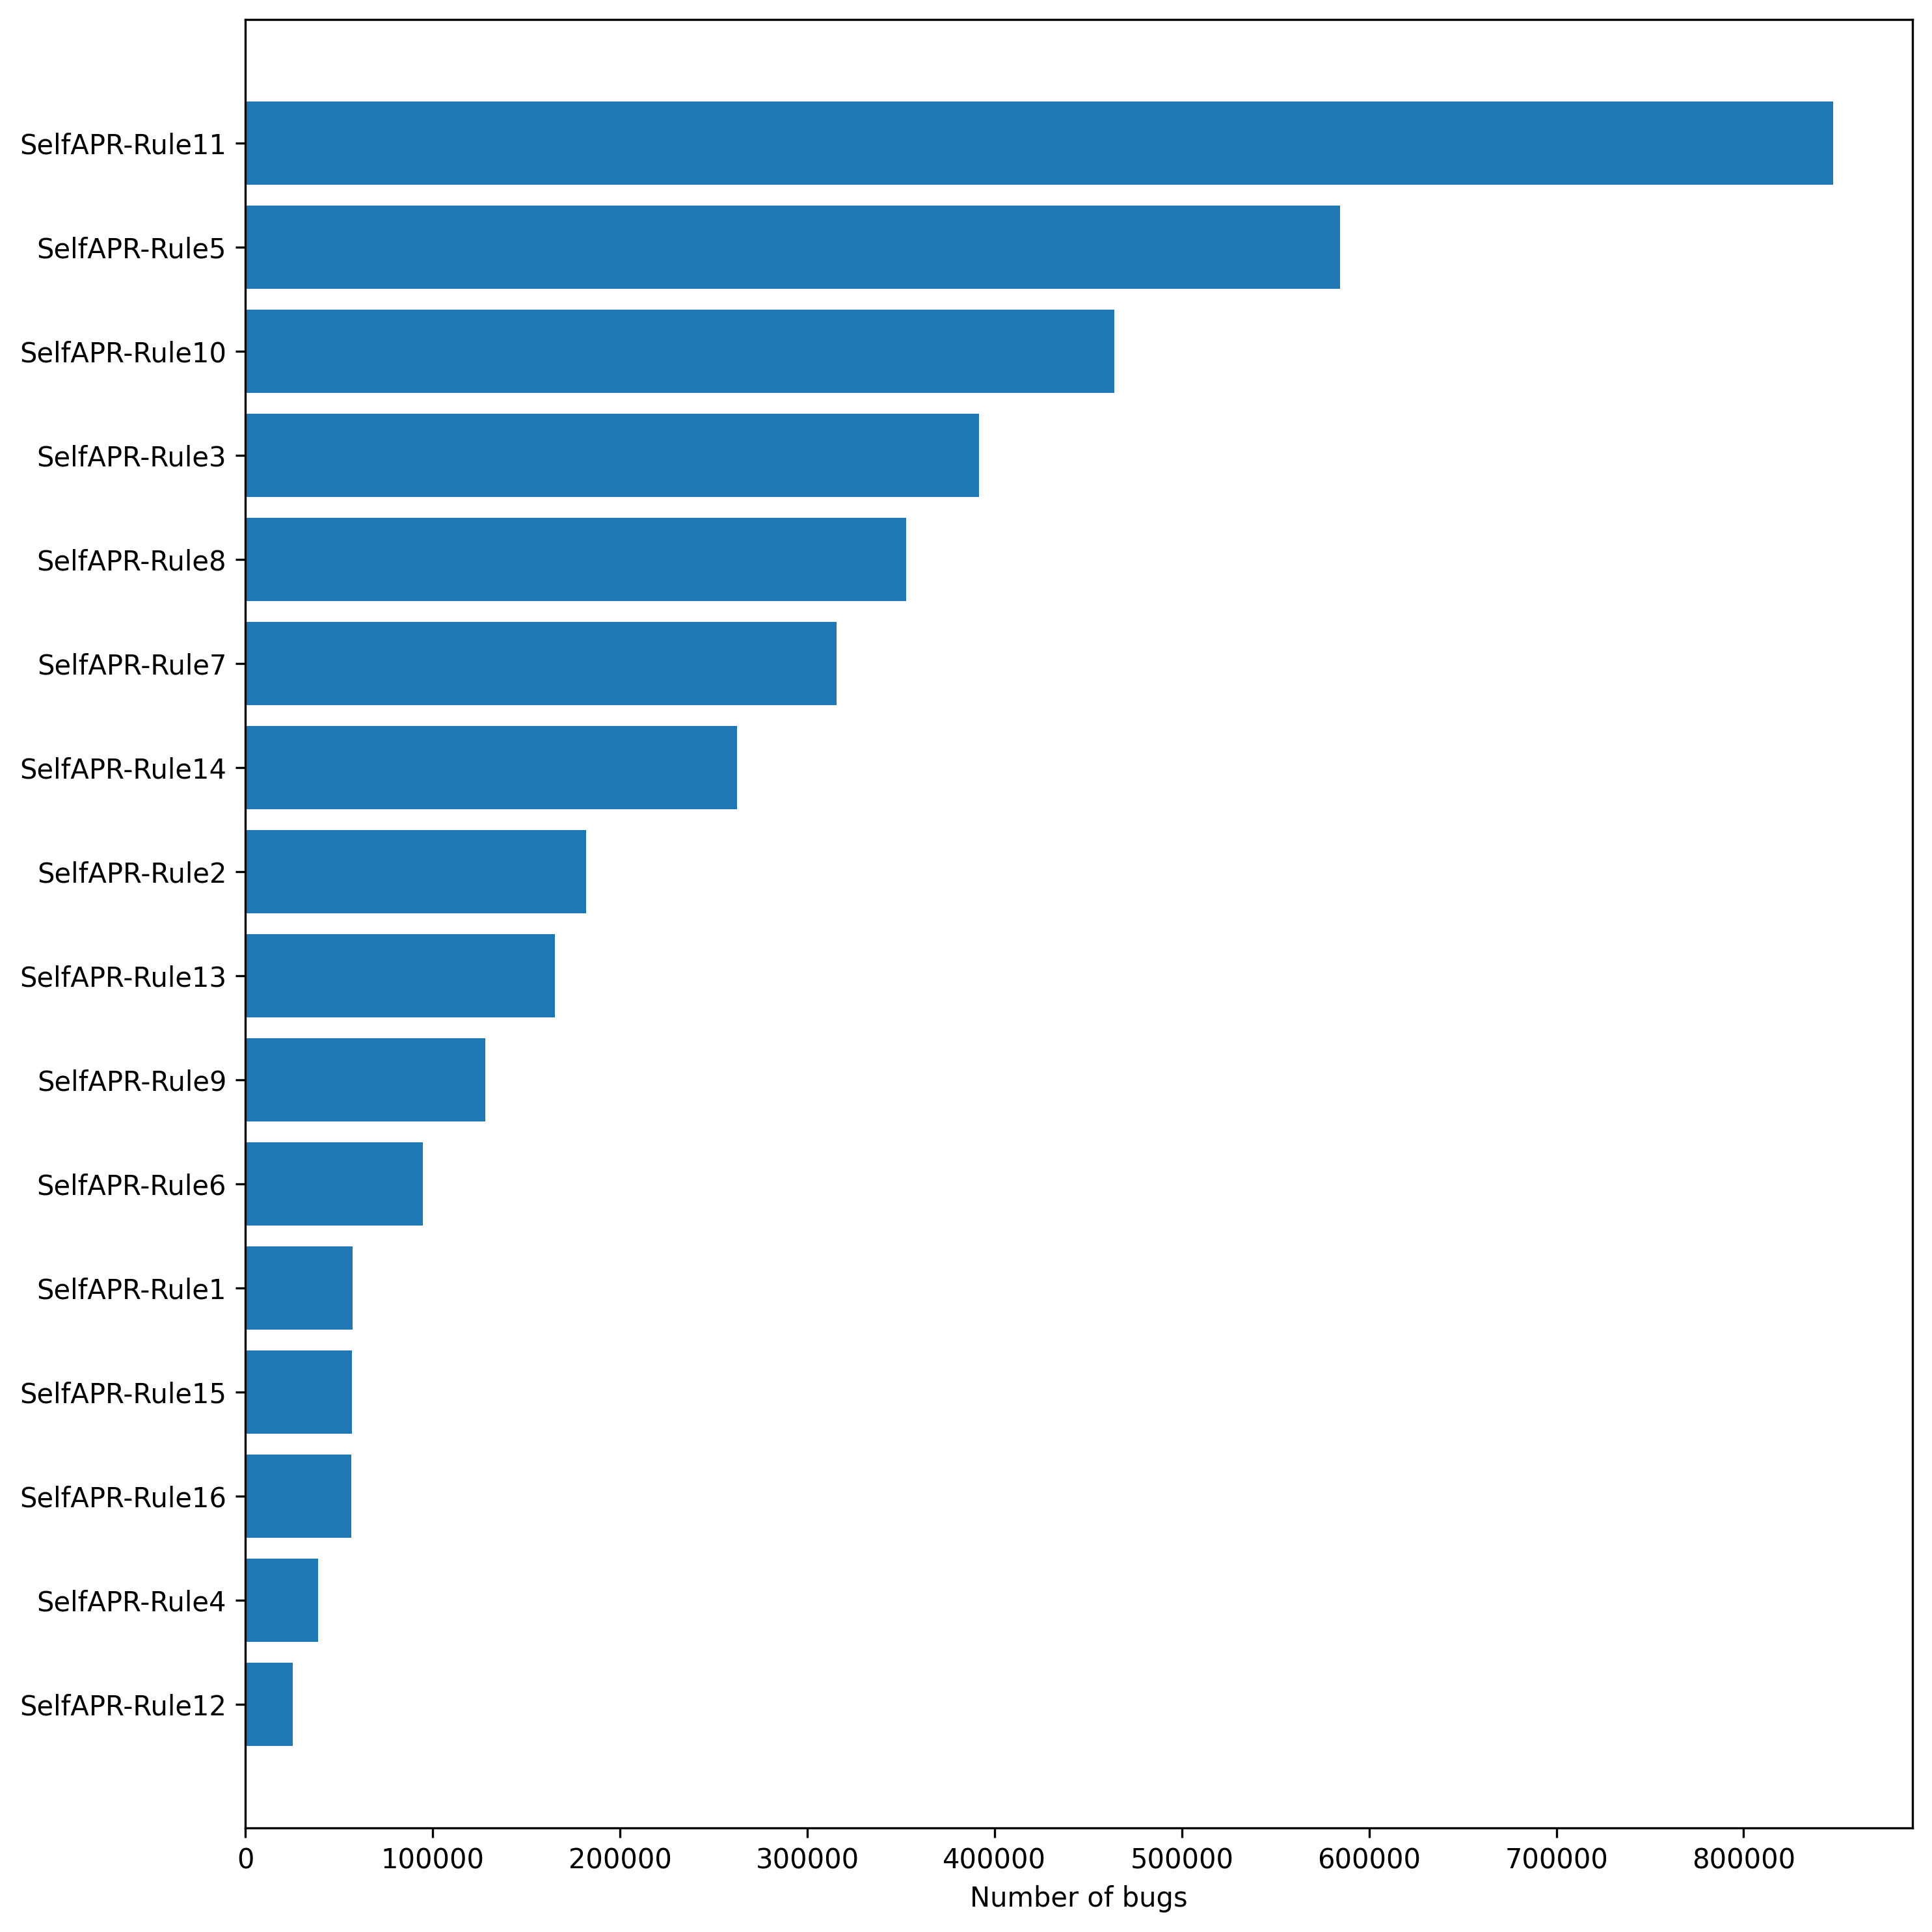

{'Bears-223': 19, 'Bears-240': 328, 'Bears-238': 452, 'Bears-230': 514, 'Bears-224': 598, 'Bears-234': 606, 'Bears-188': 797, 'Bears-209': 954, 'Bears-232': 1178, 'Bears-243': 1366, 'Bears-193': 1386, 'Bears-241': 2118, 'Bears-204': 3017, 'Bears-140': 3688, 'Bears-180': 5304, 'Bears-207': 6529, 'Bears-213': 7547, 'Bears-249': 8817, 'Bears-194': 9702, 'Bears-210': 10535, 'Bears-201': 12697, 'Bears-245': 12975, 'Bears-184': 12991, 'Bears-198': 13868, 'Bears-231': 14133, 'Bears-227': 22519, 'Bears-220': 22858, 'Bears-190': 23790, 'Bears-166': 28071, 'Bears-246': 29977, 'Bears-196': 31221, 'Bears-199': 31408, 'Bears-239': 35732, 'Bears-144': 37192, 'Bears-233': 37317, 'Bears-212': 47622, 'Bears-250': 57533, 'Bears-242': 61465, 'Bears-153': 62417, 'Bears-159': 69170, 'Bears-228': 86543, 'Bears-225': 86801, 'Bears-202': 93011, 'Bears-176': 94166, 'Bears-229': 96580, 'Bears-211': 101779, 'Bears-222': 135064, 'Bears-98': 146273, 'Bears-251': 201620, 'Bears-1': 211648, 'Bears-200': 217432, 'Bea

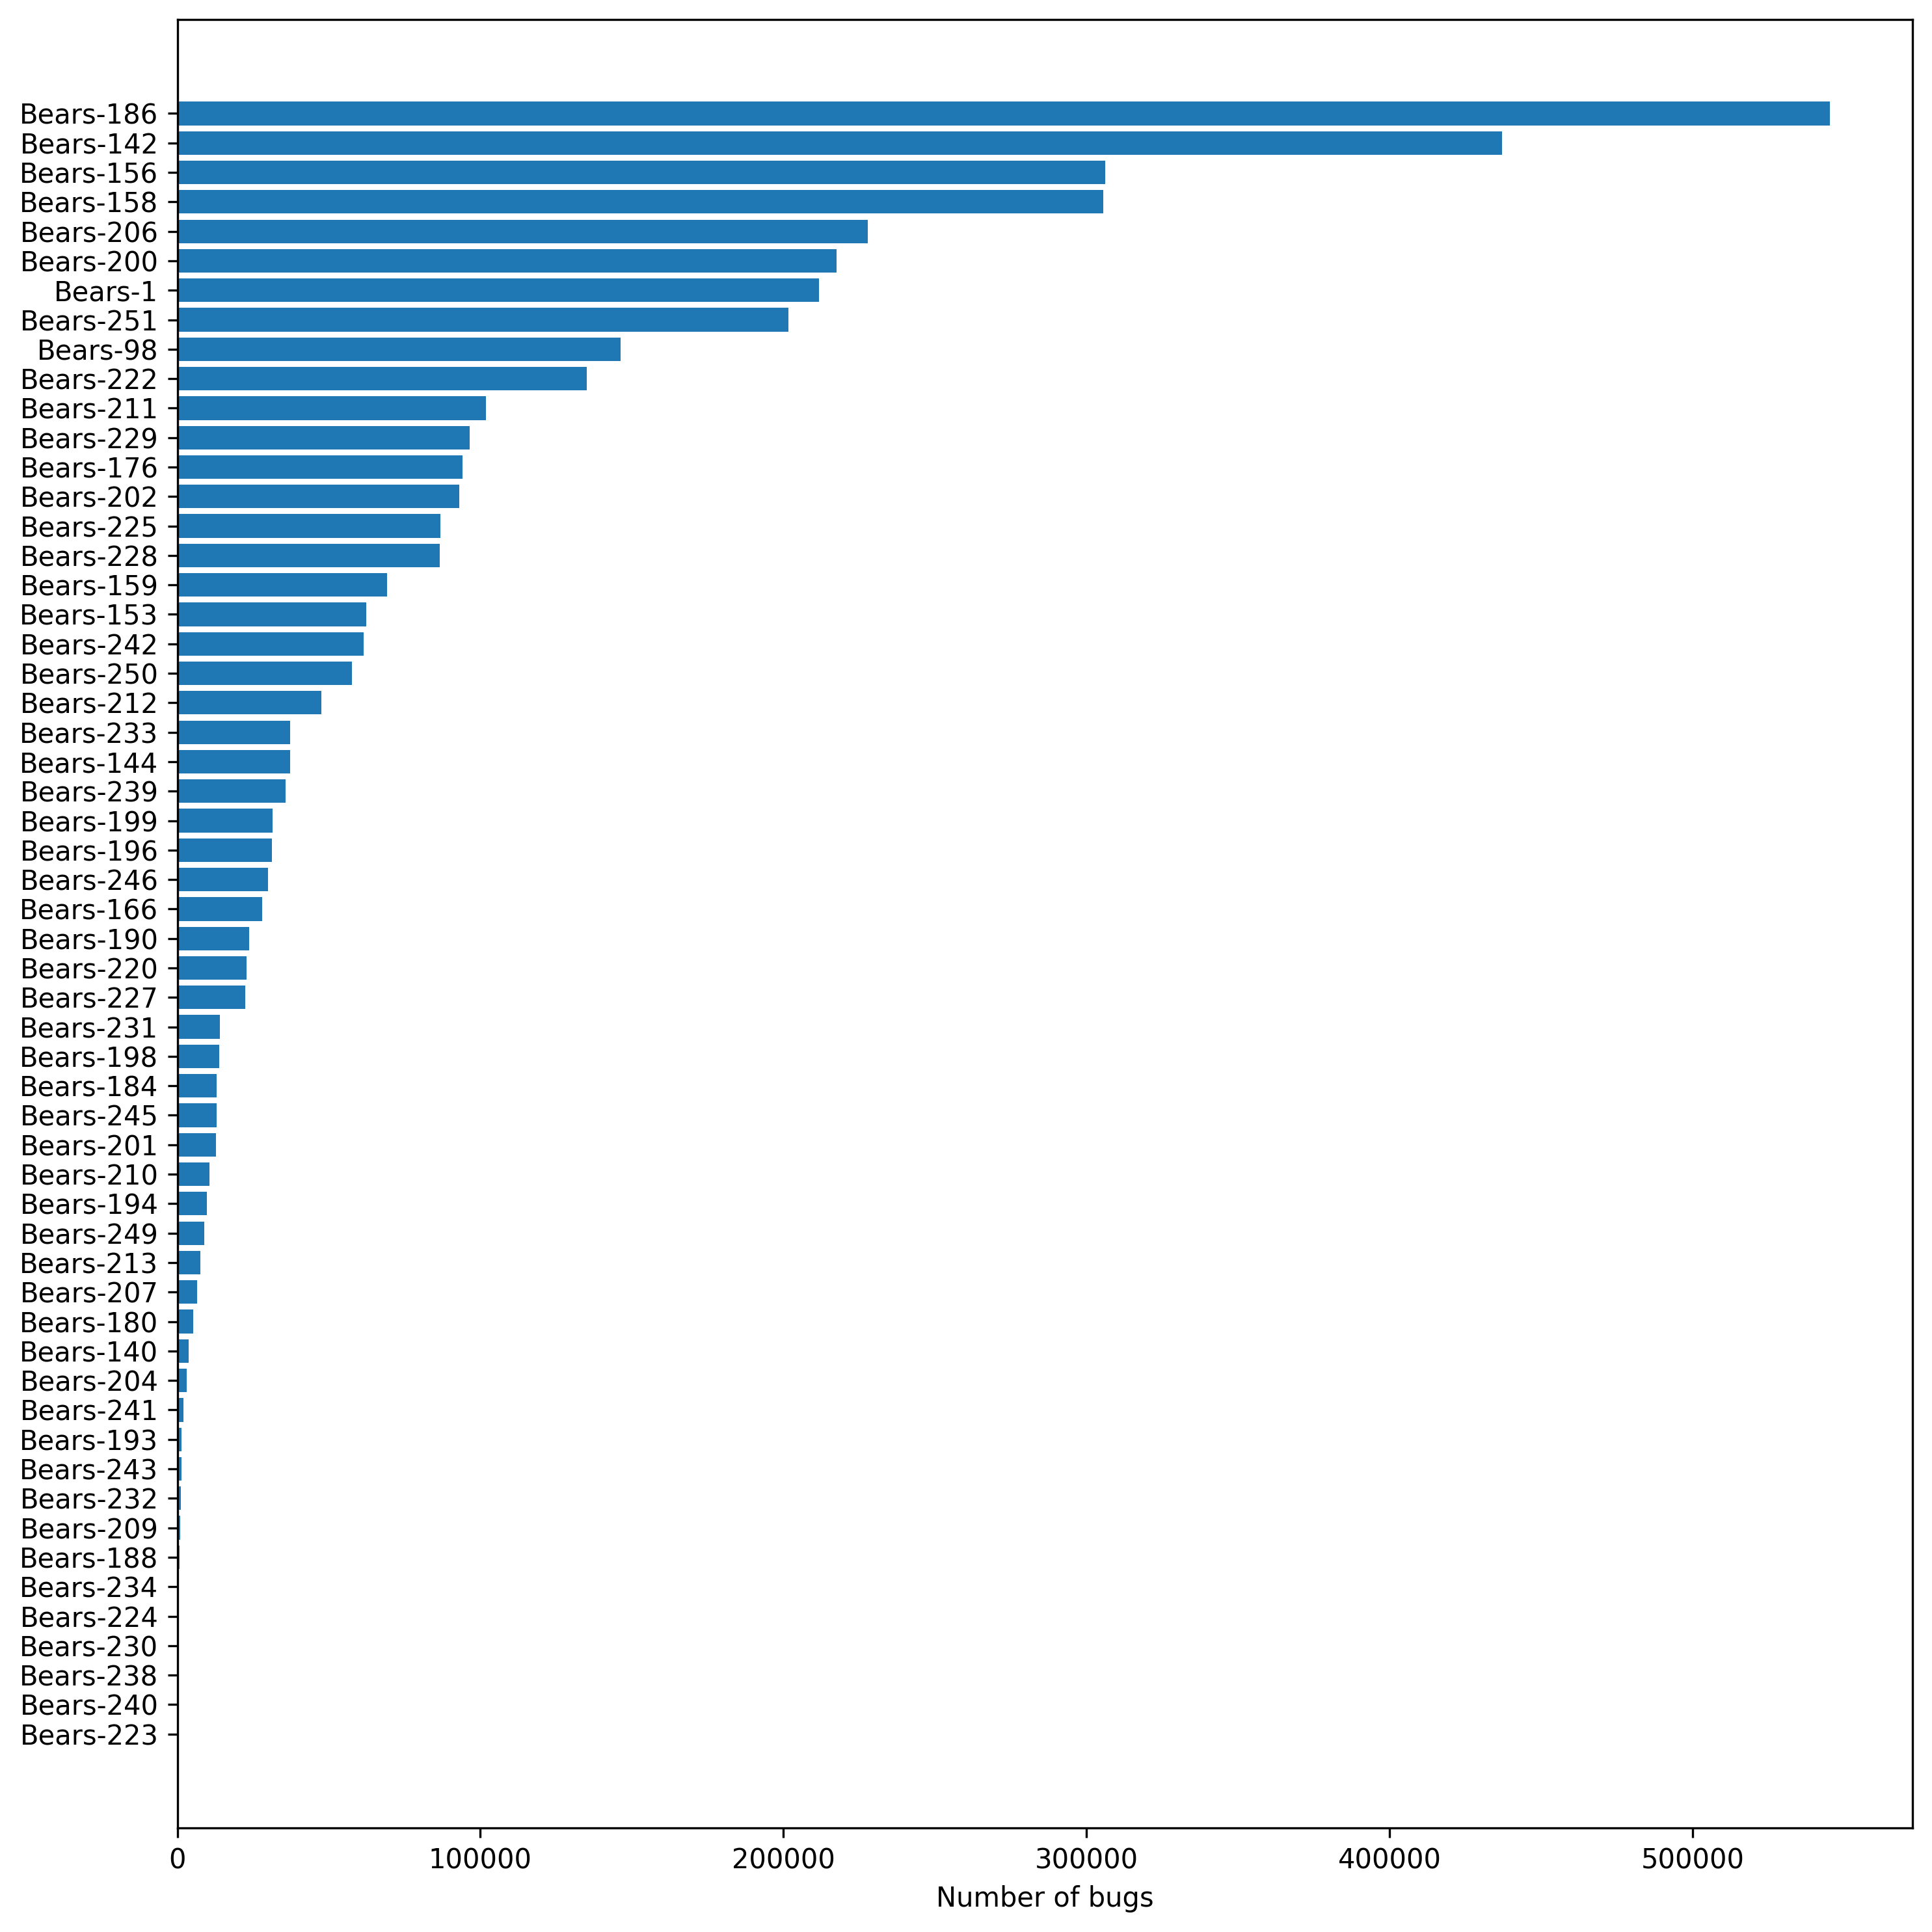

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

rule_to_rule = {'[BugLab_Argument_Swapping]': "BugLab-Rule2", 
                '[BugLab_Wrong_Literal]': "BugLab-Rule4", 
                '[BugLab_Variable_Misuse]': "BugLab-Rule1", 
                '[BugLab_Wrong_Operator]': "BugLab-Rule3",
                '[P13_Insert_Block]': "SelfAPR-Rule13", 
                '[P11_Insert_Donor_Statement]': "SelfAPR-Rule11",
                '[P5_Replace_Variable]': "SelfAPR-Rule5",
                '[P3_Replace_Literal]': "SelfAPR-Rule3",
                '[P8_Replace_Mix]': "SelfAPR-Rule8",
                '[P14_Delete_Statement]': "SelfAPR-Rule14",
                '[P10_Move_Statement]': "SelfAPR-Rule10",
                '[P7_Replace_Invocation]': "SelfAPR-Rule7",
                '[P16_Remove_Block]': "SelfAPR-Rule16",
                '[P9_Replace_Statement]': "SelfAPR-Rule9",
                '[P15_Unwrap_Block]': "SelfAPR-Rule15",
                '[P1_Replace_Type]': "SelfAPR-Rule1",
                '[P4_Replace_Constructor]': "SelfAPR-Rule4",
                '[P2_Replace_Operator]': "SelfAPR-Rule2",
                '[P6_Replace_Expression]': "SelfAPR-Rule6",
                '[P12_Insert_Condition]': "SelfAPR-Rule12"}

for dataset in datasets:
    rule_frequency = {}
    project_frequency = {}
    
    # Compute frequencies
    for example in dataset["dataset"]["train"]:
        rule = rule_to_rule[example["perturb_rule"]]
        if rule in rule_frequency:
            rule_frequency[rule] += 1
        else:
            rule_frequency[rule] = 1

        project = "-".join(example["identifier"].split("-", 2)[:2])
        if project in project_frequency:
            project_frequency[project] += 1
        else:
            project_frequency[project] = 1
            
    # Sort by aboslute frequency
    rule_frequency = dict(sorted(rule_frequency.items(), key=lambda item: item[1]))
    project_frequency = dict(sorted(project_frequency.items(), key=lambda item: item[1]))
    
    # Plot
    print(rule_frequency)
    figure(figsize=(10, 10), dpi=300)
    plt.barh(list(rule_frequency.keys()), list(rule_frequency.values()))
    plt.xlabel("Number of bugs")
    plt.tight_layout()
    plt.savefig("results/data_collection/%s_%s_rule_freq.pdf" % (dataset["orig_dataset"].lower(), dataset["perturbation_model"].lower()))
    plt.show()
        
    print(project_frequency)
    figure(figsize=(10, 10), dpi=300)
    plt.barh(list(project_frequency.keys()), list(project_frequency.values()))
    plt.xlabel("Number of bugs")
    plt.tight_layout()
    plt.savefig("results/data_collection/%s_%s_project_freq.pdf" % (dataset["orig_dataset"].lower(), dataset["perturbation_model"].lower()))
    plt.show()

## Tokenization Analysis

In [ ]:
from unidiff import PatchSet
from src.model_utils import source_str, target_str

In [ ]:
from transformers import AutoTokenizer, PLBartTokenizer

tokenizer = PLBartTokenizer.from_pretrained("/mnt/data/andre/mscthesis/experiments/defects4j_buglab/round0/fixer")
tokenizer

In [ ]:
import matplotlib.pyplot as plt

for dataset in datasets:
    print(dataset["orig_dataset"])
    print(dataset["perturbation_model"])
    source_frequency = {}
    target_frequency = {}
    for i, example in enumerate(dataset["dataset"]["train"]):
        l = len(tokenizer(source_str(example["diff"])).input_ids)
        if l in source_frequency:
            source_frequency[l] += 1
        else:
            source_frequency[l] = 1        
        l = len(tokenizer(target_str(example["diff"])).input_ids)
        if l in target_frequency:
            target_frequency[l] += 1
        else:
            target_frequency[l] = 1
            
    print(source_frequency)
    print(max(source_frequency.keys()))
    plt.bar(source_frequency.keys(), source_frequency.values())
    plt.xlabel("Number of tokens")
    plt.ylabel("Absolute frequency")
    plt.show()

    print(target_frequency)
    print(max(target_frequency.keys()))
    plt.bar(target_frequency.keys(), target_frequency.values())
    plt.xlabel("Number of tokens")
    plt.ylabel("Absolute frequency")
    plt.show()